In [80]:
import tensorflow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.src.utils.np_utils import to_categorical
import keras
import pickle

# 01 set the parameters

In [81]:
images =[]
classNum = []
path = "./myData"
myLists = os.listdir (path)
print ("Total number of classes detected : ",len (myLists))
print (myLists)
test_ratio = 0.2
validation_ratio = 0.2
imgDimension = (32, 32, 3)
BATCH_SIZE = 64
EPOCH = 20
STEPSPEREPOCH = 2000

Total number of classes detected :  10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# 02 import the imgs from the datasets

In [82]:
print ("Importing classes")
for i in range (len (myLists)) :
    myPicList = os.listdir (path + '/' + str (i))
    for j in myPicList :
        curImg = cv2.imread (f"{path}/{str (i)}/{j}")
        curImg = cv2.resize (curImg, (imgDimension[0], imgDimension[1]))
        images.append (curImg)
        classNum.append (i)
    print (i, end=" ")
    

Importing classes
0 1 2 3 4 5 6 7 8 9 

# 03 turn the imgs into the numpy array

In [83]:
images = np.array (images)
classNum = np.array (classNum)
print (images.shape)
print (classNum.shape)

(10160, 32, 32, 3)
(10160,)


# 04 split the data into train, test and validation

## 4.1 get the dataset splited

In [84]:
x_train, x_test = train_test_split (images, test_size=test_ratio)
y_train, y_test = train_test_split(classNum,test_size=test_ratio)
# test_size is the ratio of the test_date, train_size will automatically set to the complement of the test_size

print (x_train.shape)
print (x_test.shape)

x_train, x_validation = train_test_split (x_train, test_size=validation_ratio)
y_train, y_validation = train_test_split (y_train, test_size=validation_ratio)
print (x_train.shape)
print (x_validation.shape)

(8128, 32, 32, 3)
(2032, 32, 32, 3)
(6502, 32, 32, 3)
(1626, 32, 32, 3)


In [85]:
print (np.where (y_train == 0))
# np.where will tell you the index of the elements meet the condition

(array([   9,   10,   18,   25,   54,   86,   99,  106,  111,  112,  117,
        122,  133,  167,  182,  183,  186,  193,  214,  228,  233,  237,
        287,  294,  316,  325,  340,  353,  355,  356,  364,  379,  380,
        389,  392,  400,  405,  426,  435,  442,  461,  465,  467,  469,
        473,  490,  499,  502,  507,  528,  536,  555,  567,  575,  579,
        581,  582,  586,  608,  617,  619,  622,  632,  635,  649,  656,
        659,  671,  677,  687,  694,  720,  725,  733,  734,  744,  745,
        759,  760,  763,  775,  793,  795,  817,  837,  840,  850,  858,
        865,  866,  871,  890,  892,  906,  925,  939,  951,  957,  962,
        977,  981,  987, 1003, 1006, 1008, 1015, 1016, 1031, 1051, 1054,
       1071, 1073, 1077, 1103, 1109, 1113, 1119, 1120, 1130, 1149, 1160,
       1170, 1181, 1189, 1196, 1207, 1213, 1219, 1225, 1226, 1235, 1250,
       1258, 1274, 1292, 1307, 1329, 1335, 1339, 1366, 1390, 1409, 1415,
       1424, 1427, 1428, 1432, 1442, 1447, 1450, 1

## 4.2 draw the graph of the distribution of the number

In [86]:
numofSamples = []
for i in range (len (myLists)) :
    print (f"Class {i} : ", len (np.where (y_train == i)[0]))
    numofSamples.append (len (np.where (y_train == i)[0]))
print (numofSamples)
    

Class 0 :  644
Class 1 :  673
Class 2 :  672
Class 3 :  647
Class 4 :  652
Class 5 :  638
Class 6 :  653
Class 7 :  624
Class 8 :  638
Class 9 :  661
[644, 673, 672, 647, 652, 638, 653, 624, 638, 661]


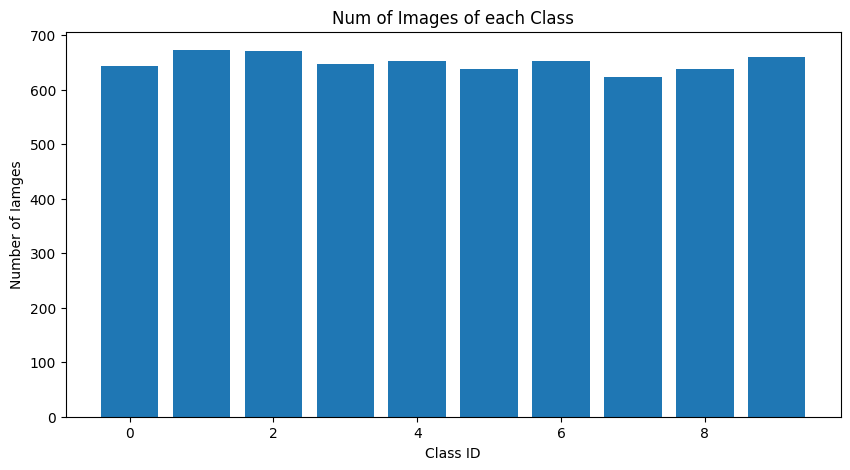

(6502, 32, 32, 3)
(32, 32, 3)


In [87]:
plt.figure (figsize=(10, 5))
plt.bar (range (len (myLists)), numofSamples)
plt.title ("Num of Images of each Class")
plt.xlabel ("Class ID")
plt.ylabel ("Number of Iamges")
plt.show ()
print (x_train.shape) # (6502, 32, 32)
print (x_train[30].shape) # (32, 32, 3)

# 05 preprocess all the images

## 5.1 define the preprocessing function

In [88]:
def preProcessing (img) :
    """
    the function is to preprocess the imgs
    1. convert it into gray scale
    2. equalize the img to a normal light
    3. normalize the img
    """
    img = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    # to equalize the images, get the light be equaled
    img = cv2.equalizeHist (img)
    # get the img normalized, setting the value within 0 to 1
    img = img / 255
    
    return img

# img = preProcessing (x_train[30]) # the image now is with the size of (32, 32)
# img = cv2.resize (img, (300, 300))
# cv2.imshow ("Img", img)
# cv2.waitKey (0)

## 5.2 use map ( ) to iterate the list by applying the function

In [89]:
# print (list (map (preProcessing, x_train[:3])))
# Make an iterator that computes the function using arguments from each of the iterables. 
# Stops when the shortest iterable is exhausted.
# print (np.array (list (map (preProcessing, x_train[:3]))))

In [90]:
x_train = np.array (list (map (preProcessing, x_train)))
x_test = np.array (list (map (preProcessing, x_test)))
x_validation = np.array (list (map (preProcessing, x_validation)))

# img = cv2.resize (x_train[30], (300, 300))
# cv2.imshow ("Img", img)
# cv2.waitKey (0)

print (x_train.shape) # (6502, 32, 32)
print (x_train[30].shape) # (32, 32)

(6502, 32, 32)
(32, 32)


## 5.3 add a depth of the img in order to meet the input condition of the convolutional neural network

In [91]:
x_train = x_train.reshape ((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape ((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_validation = x_validation.reshape ((x_validation.shape[0], x_validation.shape[1], x_validation.shape[2], 1))
print (x_train.shape) # (6502, 32, 32, 1)


(6502, 32, 32, 1)


## 5.4 argument the imgs by resize, rotation, flipping, shearing, zooming

In [92]:
dataGen = ImageDataGenerator (
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1, # all above are percentage
    rotation_range=10, # degree
)
dataGen.fit (x_train) # apply the procedure on the list

## 5.5 turn the label into a binary vector which indicate the class

In [93]:
y_train = to_categorical (y_train, len (myLists))
y_test = to_categorical (y_test, len (myLists))
y_validation = to_categorical (y_validation, len (myLists))
# a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
# >>> print(a)
# [[1. 0. 0. 0.]
#  [0. 1. 0. 0.]
#  [0. 0. 1. 0.]
#  [0. 0. 0. 1.]]

# 06 define our training model

In [94]:
def myModel () :
    numofFilters = 60
    sizeofFilter1 = (5, 5)
    sizeofFilter2 = (3, 3)
    sizeofPool = (2, 2)
    numofNode = 500
    
    model = keras.Sequential ()
    model.add (
        keras.layers.Conv2D (
            numofFilters,
            sizeofFilter1,
            input_shape=(
                imgDimension[0],
                imgDimension[1],
                1
            ),
            activation="relu"
        )
    )
    model.add (
        keras.layers.Conv2D (
            numofFilters,
            sizeofFilter1,
            activation="relu"
        )
    )
    model.add (
        keras.layers.MaxPooling2D (
            pool_size=sizeofPool
        )
    )
    model.add (
        keras.layers.Conv2D (
            numofFilters // 2,
            sizeofFilter2,
            activation="relu"
        )
    )
    model.add (
        keras.layers.Conv2D (
            numofFilters // 2,
            sizeofFilter2,
            activation="relu"
        )
    )
    model.add (
        keras.layers.MaxPooling2D (
            pool_size=sizeofPool
        )
    )
    model.add (
        keras.layers.Dropout (0.5)
    )
    model.add (
        keras.layers.Flatten ()
    )
    model.add (
        keras.layers.Dense (numofNode, activation="relu")
    )
    model.add (
        keras.layers.Dropout (0.5)
    )
    model.add (
        keras.layers.Dense (len (myLists), activation="softmax")
    )
    model.compile (
        optimizer=keras.optimizers.Adam (learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=['accuracy']
    )
    
    return model

In [95]:
model = myModel ()
print (model.summary ())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                 

In [96]:
# model.fit_generator (
#     dataGen.flow (x=x_train, y=y_train, batch_size=BATCH_SIZE),
#     steps_per_epoch=STEPSPEREPOCH,
#     epochs=EPOCH,
#     validation_data=(x_validation, y_validation),
#     shuffle=True
# )

In [97]:
history = model.fit (
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=EPOCH,
            validation_data=(x_validation, y_validation),
            shuffle=True,
            # steps_per_epoch=STEPSPEREPOCH
        )

Epoch 1/20


102/102 [==============================] - 25s 233ms/step - loss: 2.3043 - accuracy: 0.0997 - val_loss: 2.3033 - val_accuracy: 0.0990
Epoch 2/20
102/102 [==============================] - 25s 246ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3035 - val_accuracy: 0.0990
Epoch 3/20
102/102 [==============================] - 25s 243ms/step - loss: 2.3030 - accuracy: 0.0966 - val_loss: 2.3035 - val_accuracy: 0.0990
Epoch 4/20
102/102 [==============================] - 28s 278ms/step - loss: 2.3029 - accuracy: 0.1041 - val_loss: 2.3032 - val_accuracy: 0.0990
Epoch 5/20
102/102 [==============================] - 30s 294ms/step - loss: 2.3028 - accuracy: 0.1018 - val_loss: 2.3035 - val_accuracy: 0.0855
Epoch 6/20
102/102 [==============================] - 29s 282ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3035 - val_accuracy: 0.0855
Epoch 7/20
102/102 [==============================] - 29s 288ms/step - loss: 2.3027 - accuracy: 0.1067 - val_loss: 2.3036 - val_accuracy: 0.0

# 07 show the result

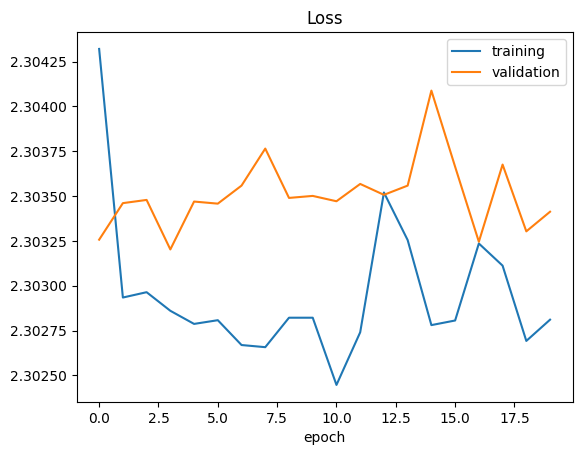

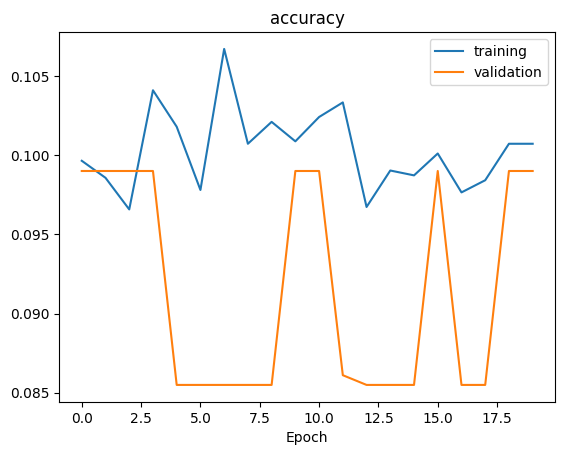

64/64 [==============================] - 2s 31ms/step - loss: 2.3036 - accuracy: 0.0896
Test Socre =  2.30360746383667
Test Accuracy 0.08956693112850189


In [98]:
plt.figure (1)
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])
plt.legend (['training', 'validation'])
plt.title ("Loss")
plt.xlabel ('epoch')

plt.figure (2)
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.legend (['training', 'validation'])
plt.title ("accuracy")
plt.xlabel ('Epoch')

plt.show ()

score = model.evaluate (x_test, y_test)
print ("Test Socre = ", score[0])
print ("Test Accuracy", score[1])

# 08 save the model

In [99]:
pickle_out = open ("model_trained.p", "wb")
pickle.dump (model, pickle_out)
pickle_out.close ()